# Worley noise!

Honestly this algorithm was much simpler than Perlin noise

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def worley_noise (overall_size = 10, resolution = 25, plot = True, matrix_output = False, random_state = 42):
    """
    Inputs:
    
    overall_size: an N by N grid defining the number of gradient vectors to use

    resolution: a step size for how well defined you want the noise to look

    plot: True or False to display the plot

    matrix_output: True or False to get the noise values in a matrix output

    random_state: random value to make the noise

    Outputs:

    A heatmap of the generated noise

    Optional noise value output

    """
    # overall grid size
    N = overall_size

    # pixels per grid
    M = resolution

    np.random.seed(random_state)

    # dictionary to store which cells have feature points and where they are
    feature_points = {}

    # randomly determine feature points
    for cell_x in range(N):
        for cell_y in range(N):
            random_local_x = np.random.choice(M)
            random_local_y = np.random.choice(M)
            feature_points[(cell_x, cell_y)] = [np.array([random_local_x, random_local_y]), np.array([random_local_x, random_local_y]) + np.array([(cell_x*M), (cell_y*M)])]

    values = []

    # get distance from every point to closest feature point
    for i in range(N*M):
        for j in range(N*M):
            # global pixel position
            x, y = i, j
            current_point = np.array([x, y])

            cell_width, cell_height = M, M

            # only need to check current cell and adjacent cell
            cell_x_index = int(np.floor(x/cell_width))
            cell_y_index = int(np.floor(y/cell_height))

            # print(f"Current x, y:{(x, y)} and cell: {(cell_x_index, cell_y_index)}")

            # calculating local coordinates
            cell_x_origin = int(cell_x_index * cell_width)
            cell_y_origin = int(cell_y_index * cell_height)
            
            # local coordinates 
            lx, ly = [(x - cell_x_origin), (y - cell_y_origin)]

            fp_keys = feature_points.keys()

            possible_locations = []

            # current cell
            possible_locations.append(feature_points[(cell_x_index, cell_y_index)][1])
            
            # right one
            if (cell_x_index + 1, cell_y_index) in fp_keys:
                possible_locations.append(feature_points[(cell_x_index + 1, cell_y_index) ][1])

            # down one 
            if (cell_x_index, cell_y_index + 1) in fp_keys:
                possible_locations.append(feature_points[(cell_x_index, cell_y_index + 1)][1])


            # up one
            if (cell_x_index, cell_y_index - 1) in fp_keys:
                possible_locations.append(feature_points[(cell_x_index, cell_y_index - 1)][1])

            
            # left one 
            if (cell_x_index - 1, cell_y_index) in fp_keys:
                possible_locations.append(feature_points[(cell_x_index - 1, cell_y_index)][1])

            
            # up and left one
            if (cell_x_index - 1, cell_y_index - 1) in fp_keys:
                possible_locations.append(feature_points[(cell_x_index - 1, cell_y_index - 1)][1])


            # up and right one
            if (cell_x_index + 1, cell_y_index - 1) in fp_keys:
                possible_locations.append(feature_points[(cell_x_index + 1, cell_y_index - 1)][1])


            # down and right one
            if (cell_x_index + 1, cell_y_index + 1) in fp_keys:
                possible_locations.append(feature_points[(cell_x_index + 1, cell_y_index + 1)][1])

            # down and left one
            if (cell_x_index - 1, cell_y_index + 1) in fp_keys:
                possible_locations.append(feature_points[(cell_x_index - 1, cell_y_index + 1)][1])

            
            # cacluating distance
            distances = []
            # print(f"There are {len(possible_locations)} valid locations at: {possible_locations}")

            for loc in possible_locations:
                d = np.sqrt(np.sum(np.square(current_point - loc)))
                distances.append(d)

            values.append(min(distances))

    noise = np.reshape(values, (N * M, N * M))

    # normalize to be between 0 and 1
    normalized_noise = (noise - np.min(noise)) / (np.max(noise) - np.min(noise))

    if plot:
        plt.figure(figsize=(8,8))
        sns.heatmap(
            normalized_noise,
            cmap = 'gray_r',
            cbar = False
        )
        plt.axis("off")

    if matrix_output:
        return noise

## Examples

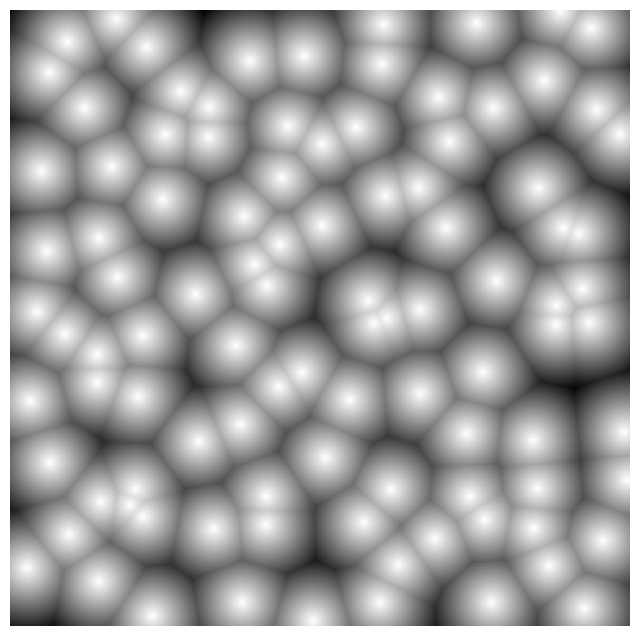

In [159]:
worley_noise(resolution=100)

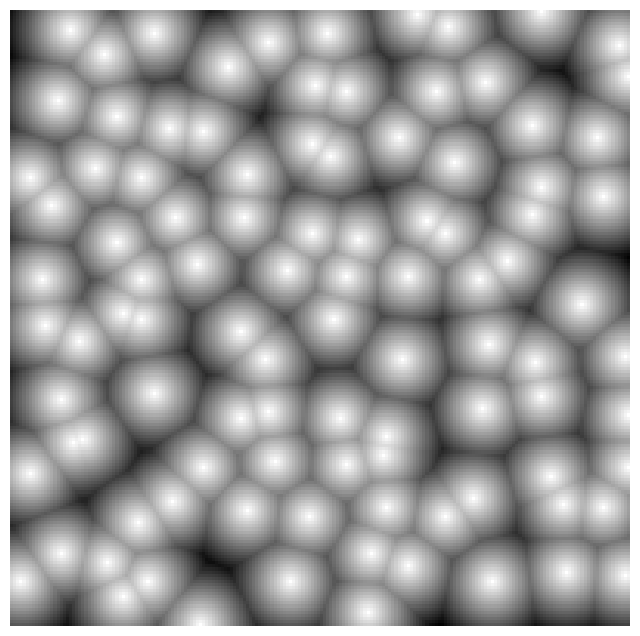

In [158]:
worley_noise(overall_size = 10, resolution=20)